In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

ЗАДАНИЕ №1

In [147]:
def f(x):
    return np.sinh(x) * np.cos(3 * x)
xx = symbols('x')
func = sinh(xx) * cos(3*xx)
func


cos(3*x)*sinh(x)

In [148]:
a, b = -1, 2
N=10
err_bound = 0.01 * (b - a)
h_init = (b-a) / N
x_nod = np.arange(a, b, h_init)

ОЦЕНКА ВТОРОЙ РАЗНОСТНОЙ ПРОИЗВОДНОЙ

In [149]:
second_dif= (f(x_nod + h_init) - 2 * f(x_nod) + f(x_nod - h_init)) / h_init**2
max_second_diff = np.max(np.abs(second_dif))  # Максимальная вторая разностная производная
max_second_diff

17.203044069861207

In [150]:
# Вычисляем шаг для первой правой разностной производной, учитывая погрешность
h_right = 2 * err_bound / max_second_diff
h_right

0.0034877548273631828

In [151]:
x_values_fine = np.arange(a, b, h_right)
right_diff_deriv = (f(x_values_fine + h_right) - f(x_values_fine)) / (h_right)

In [152]:
#2 Оценка третьей разностной производной
third_dif = (f(x_nod + h_init) - 3 * f(x_nod) + 3 * f(x_nod - h_init) - f(x_nod - 2 * h_init)) / h_init**3
max_third_dif = np.max(np.abs(third_dif))
max_third_dif

37.83918583476903

In [153]:
# Граница ошибки и оптимальный шаг для центральной разностной производной
err_bound = 0.01 * (b - a)
h_center = np.sqrt(3*err_bound/max_third_dif) # Оптимальный шаг

# Вычисление значений первой центральной разностной производной
x_values_fine = np.arange(a + h_center, b - h_center, h_center)  # Избегаем краевых значений
central_diff_deriv = (f(x_values_fine + h_center) - f(x_values_fine - h_center)) / (2 * h_center)

In [154]:
# Аналитически вычисленная производная
def real_dif(x:np.ndarray) -> np.ndarray:
    reall_dif = np.cosh(x) * np.cos(3*x) - 3 * np.sinh(x) * np.sin(3*x)
    return reall_dif

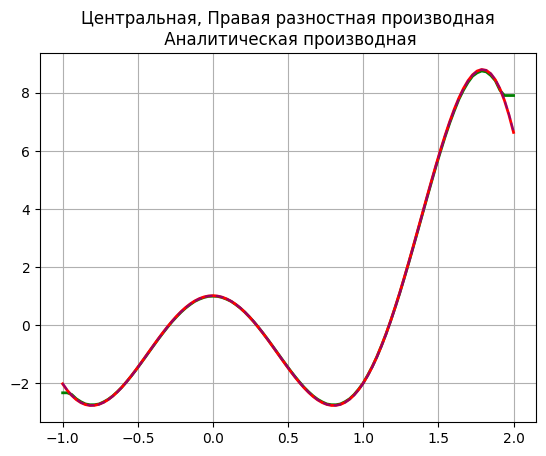

In [155]:
x_full = np.linspace(a, b, 100)
plt.plot(x_full, np.interp(x_full, np.arange(a + h_center, b - h_center, h_center), central_diff_deriv), 
         label='Центральная разностная производная', color='green', linewidth=2)
plt.plot(x_full, np.interp(x_full, np.arange(a, b, h_right), right_diff_deriv), 
         label='Правая разностная производная', color='red', linewidth=2 )
plt.plot(x_full, real_dif(x_full), color='blue', alpha=0.4 , linestyle='--') 
plt.title(f"Центральная, Правая разностная производная\n Аналитическая производная")
plt.grid(True)

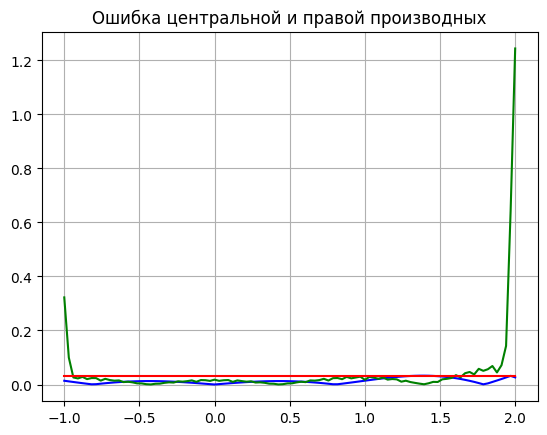

In [156]:
# 3

x_full = np.linspace(a, b, 100)
plt.plot(x_full, abs(np.interp(x_full, np.arange(a, b, h_right), right_diff_deriv) - real_dif(np.linspace(a, b, 100))), color='blue')
plt.plot(x_full, abs(np.interp(x_full, np.arange(a + h_center, b - h_center, h_center), central_diff_deriv) - real_dif(np.linspace(a, b, 100))), color='green')
plt.plot(x_full, np.array([err_bound]*100), color='red')
plt.title(f"Ошибка центральной и правой производных")
plt.grid(True)